In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\malay\OneDrive\Dokumen\Sandu\thyroid.csv")

In [3]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.drop_duplicates(keep='first',inplace=True)

In [6]:
df.shape

(364, 17)

In [7]:
data=pd.DataFrame(df)

In [8]:
data=data.astype(str)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
ord=[['F','M']]
oe=OrdinalEncoder(categories=ord)
data['Gender']=oe.fit_transform(data[['Gender']])

In [11]:
ord=[['No','Yes']]
oe=OrdinalEncoder(categories=ord)
data['Smoking']=oe.fit_transform(data[['Smoking']])

In [12]:
ord=[['No','Yes']]
oe=OrdinalEncoder(categories=ord)
data['Hx Smoking']=oe.fit_transform(data[['Hx Smoking']])

In [13]:
ord=[['No','Yes']]
oe=OrdinalEncoder(categories=ord)
data['Hx Radiothreapy']=oe.fit_transform(data[['Hx Radiothreapy']])

In [14]:
ord=[['Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism',
       'Subclinical Hyperthyroidism', 'Subclinical Hypothyroidism']]
oe=OrdinalEncoder(categories=ord)
data["Thyroid Function"]=oe.fit_transform(data[['Thyroid Function']])

In [15]:
ord=[['Single nodular goiter-left', 'Multinodular goiter',
       'Single nodular goiter-right', 'Normal', 'Diffuse goiter']]
oe=OrdinalEncoder(categories=ord)
data["Physical Examination"]=oe.fit_transform(data[['Physical Examination']])

In [16]:
ord=[['No', 'Right', 'Extensive', 'Left', 'Bilateral', 'Posterior']]
oe=OrdinalEncoder(categories=ord)
data["Adenopathy"]=oe.fit_transform(data[['Adenopathy']])

In [17]:
ord=[['Micropapillary', 'Papillary', 'Follicular', 'Hurthel cell']]
oe=OrdinalEncoder(categories=ord)
data["Pathology"]=oe.fit_transform(data[['Pathology']])

In [18]:
ord=[['Uni-Focal', 'Multi-Focal']]
oe=OrdinalEncoder(categories=ord)
data["Focality"]=oe.fit_transform(data[['Focality']])

In [19]:
ord=[['Low', 'Intermediate', 'High']]
oe=OrdinalEncoder(categories=ord)
data["Risk"]=oe.fit_transform(data[['Risk']])

In [20]:
ord=[['T1a', 'T1b', 'T2', 'T3a', 'T3b', 'T4a', 'T4b']]
oe=OrdinalEncoder(categories=ord)
data["T"]=oe.fit_transform(data[['T']])

In [21]:
ord=[['N0', 'N1b', 'N1a']]
oe=OrdinalEncoder(categories=ord)
data["N"]=oe.fit_transform(data[['N']])

In [22]:
ord=[['M0', 'M1']]
oe=OrdinalEncoder(categories=ord)
data["M"]=oe.fit_transform(data[['M']])

In [23]:
ord=[['I', 'II', 'IVB', 'III', 'IVA']]
oe=OrdinalEncoder(categories=ord)
data["Stage"]=oe.fit_transform(data[['Stage']])

In [24]:
ord=[['Indeterminate', 'Excellent', 'Structural Incomplete',
       'Biochemical Incomplete']]
oe=OrdinalEncoder(categories=ord)
data["Response"]=oe.fit_transform(data[['Response']])

In [25]:
ord=[['No','Yes']]
oe=OrdinalEncoder(categories=ord)
data['Recurred']=oe.fit_transform(data[['Recurred']])

In [26]:
data["Recurred"].unique()

array([0., 1.])

In [27]:
data["Age"]=np.where(df["Age"]<=18,0,np.where((df["Age"]>=19)&(df["Age"]<=64),1,np.where(df["Age"]>=65,2,df["Age"])))
#Young- 0
#Middle age- 1
#Senior- 2

In [28]:
data["Age"].value_counts()

Age
1    325
2     34
0      5
Name: count, dtype: int64

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score,f1_score

In [31]:
x=data.iloc[:,:-1]
y=data['Recurred']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

# DecisionTree Classifier

In [33]:
dt=DecisionTreeClassifier(criterion="entropy",min_samples_split=3,min_samples_leaf=2)
dt.fit(x_train,y_train)
dt.score(x_test,y_test)*100,dt.score(x_train,y_train)*100

(97.26027397260275, 97.59450171821305)

In [34]:
print(accuracy_score(y_test,dt.predict(x_test))*100)
print(precision_score(y_test,dt.predict(x_test))*100)
print(recall_score(y_test,dt.predict(x_test))*100)
print(f1_score(y_test,dt.predict(x_test))*100)

97.26027397260275
100.0
88.88888888888889
94.11764705882352


<Axes: >

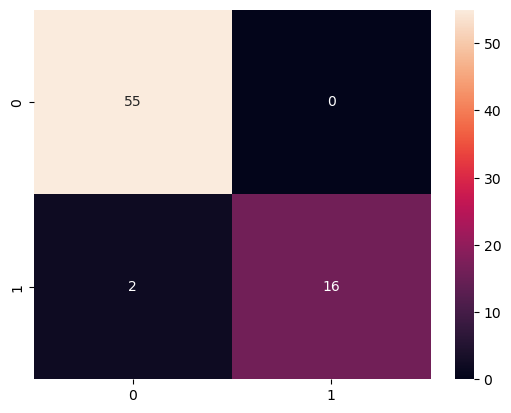

In [35]:
cf=confusion_matrix(y_test,dt.predict(x_test))
sns.heatmap(cf,annot=True)

# Random Forest Classifier

In [36]:
rf=RandomForestClassifier(criterion="entropy",min_samples_split=3,min_samples_leaf=2)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)*100,rf.score(x_train,y_train)*100

(97.26027397260275, 97.59450171821305)

In [37]:
print(accuracy_score(y_test,rf.predict(x_test))*100)
print(precision_score(y_test,rf.predict(x_test))*100)
print(recall_score(y_test,rf.predict(x_test))*100)
print(f1_score(y_test,rf.predict(x_test))*100)

97.26027397260275
100.0
88.88888888888889
94.11764705882352


<Axes: >

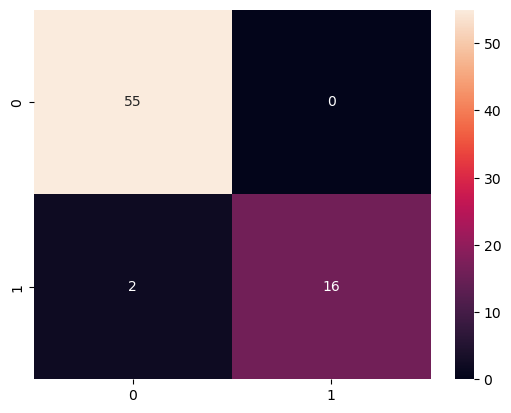

In [118]:
cf=confusion_matrix(y_test,rf.predict(x_test))
sns.heatmap(cf,annot=True)

# Gradient Boosting Classifier

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

In [401]:
gd=GradientBoostingClassifier(subsample=0.29,criterion="squared_error",min_samples_split=5,min_samples_leaf=5)
gd.fit(x_train,y_train)
gd.score(x_test,y_test)*100,gd.score(x_train,y_train)*100

(98.63013698630137, 98.28178694158075)

In [403]:
print(accuracy_score(y_test,gd.predict(x_test))*100)
print(precision_score(y_test,gd.predict(x_test))*100)
print(recall_score(y_test,gd.predict(x_test))*100)
print(f1_score(y_test,gd.predict(x_test))*100)

98.63013698630137
100.0
94.44444444444444
97.14285714285714


<Axes: >

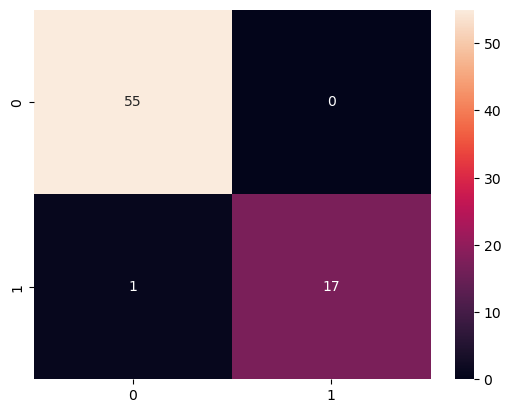

In [402]:
cf=confusion_matrix(y_test,gd.predict(x_test))
sns.heatmap(cf,annot=True)